<a href="https://colab.research.google.com/github/gustavonaumann/Data_Science/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

print('Dimensões do conjunto original:', df.shape)

#separar parte (15%) dos dados em teste e o resto (85%) em validação
test = df.sample(frac=0.15, random_state=0)

df = df.drop(test.index)

print('Dimensões do conjunto de teste:', test.shape)

print('Dimensões do conjunto de treino:', df.shape)

Dimensões do conjunto original: (284807, 31)
Dimensões do conjunto de teste: (42721, 31)
Dimensões do conjunto de treino: (242086, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:

* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

### Observar as 5 primeiras entradas

In [ ]:
# ver as 5 primeiras entradas do dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A partir das 5 primeiras entradas, conseguimos observar como a transformação PCA descaracterizou as variáveis do conjunto de dados. Para saber mais sobre transformações PCA, [clique *aqui*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf). Também, conseguimos observar que as colunas `Time` e `Amount` não receberam modificação, e a variável alvo está na coluna `Class`, onde:
  * **0** representa uma **transação normal**
  * **1** representa uma **transação fraudulenta**

### Resumo estatístico

In [ ]:
# ver o resumo estatístico do conjunto de dados

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


A partir do método `describe()`, podemos observar que não há nenhuma discrepância aparente no conjunto de dados. Ainda, é possível observar que a coluna `Amount` desconsidera a diferença entre transação normal ou fraudulenta, e possui valores esperados, pois como se trata de transações de cartão de crédito, geralmente não possuem um valor muito elevado. Temos para a coluna `Amount`:
* **Valor médio:** 88.61
* **Mediana:** 22.00
* **Desvio padrão:** 247.65
* **Valor máximo:** 19656.53

### Checar a presença de valores nulos

In [ ]:
# verificar presença de valores ausentes
df.isnull().sum().max()

0

Na função acima, observamos que não há valores ausentes no conjunto de dados, não sendo necessário uma etapa de limpeza dos dados.

### Gráficos

Inicialmente, iremos verificar o balanceamento entre transações normais e fraudulentas:

Class
0    241668
1       418
Name: count, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

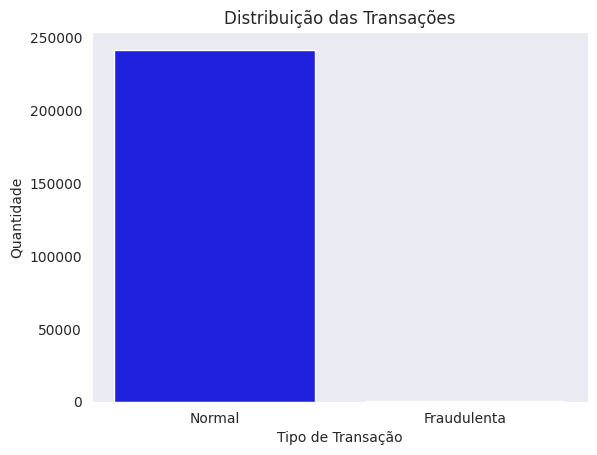

In [ ]:
# ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot(x='Class', data=df, ax=ax, palette=['b', 'r'])

#personalização do gráfico
classes = ['Normal', 'Fraudulenta']
ax.set_title('Distribuição das Transações')
ax.set_xticklabels(classes)
ax.set_xlabel("Tipo de Transação")
ax.set_ylabel("Quantidade")
plt.plot()

O gráfico de barras acima demonstra a discrepância entre os 2 tipos de transação. Mais adiante, veremos que isso atrapalha o modelo e será necessário um balanceamento dos dados para o modelo final de classificação. O próximo gráfico é apenas para observarmos a progressão temporal das transações normais e fraudulentas, não há nenhuma informação relevante que pode ser extraída.

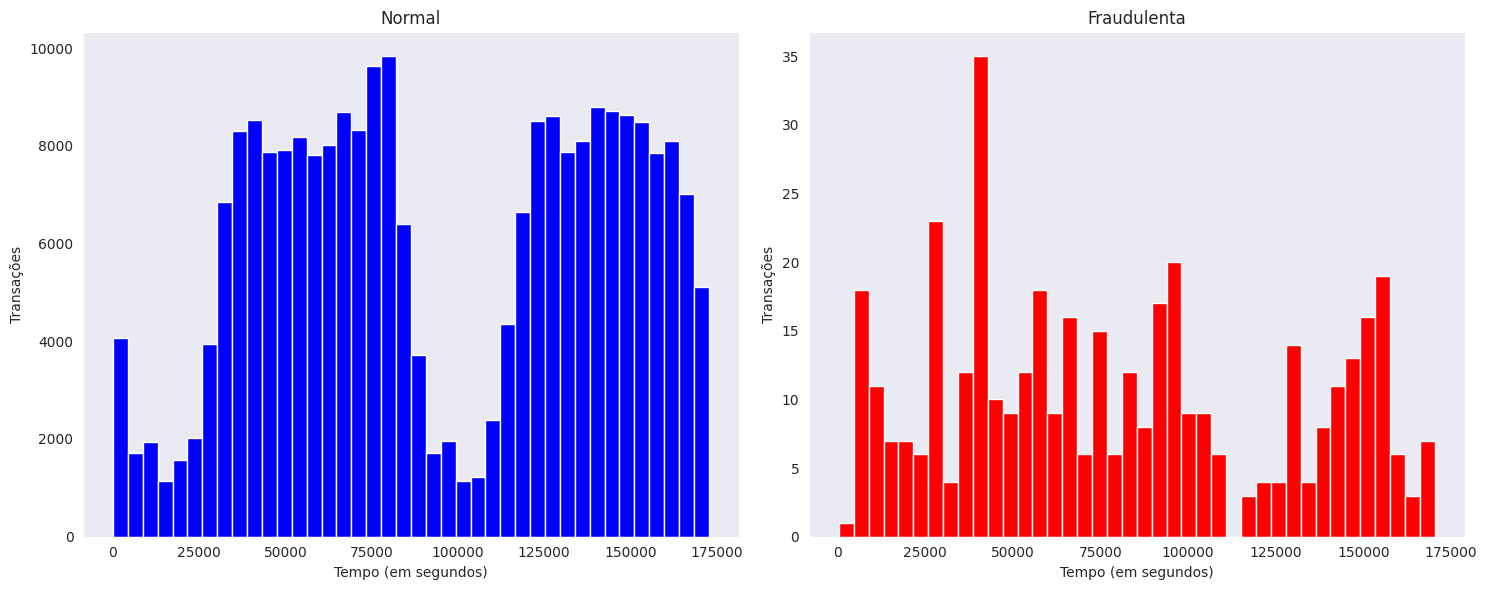

In [ ]:
#plotar ambos gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))


#personalização dos gráficos
num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='b')
ax[0].set_title('Normal')
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (em segundos)')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='r')
ax[1].set_title('Fraudulenta')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Tempo (em segundos)')


plt.tight_layout()

A seguir, iremos plotar *boxplots* para observar diferenças entre os dois tipos de transações em relação à variável `Amount`.

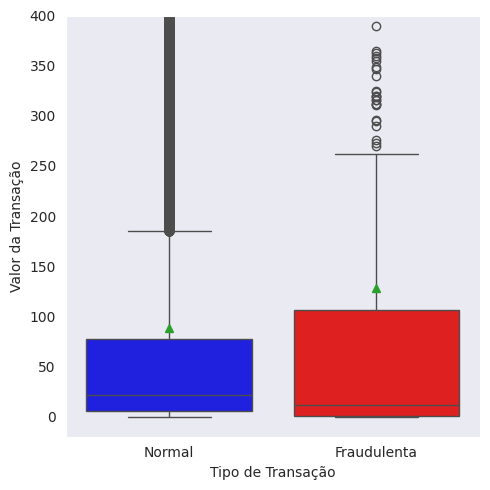

In [ ]:
#plotar os boxplots juntos
fig, ax = plt.subplots(figsize=(5,5), sharex=True)

sns.boxplot(x='Class', y='Amount', data=df, showmeans=True, palette=['b', 'r'])

#personalização do gráfico
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraudulenta'])
plt.xlabel('Tipo de Transação')
plt.ylabel('Valor da Transação')

plt.tight_layout()

Pelo gráfico acima, conseguimos perceber que há uma diferença entre a distribuição dos dois tipos de transação, o que irá contribuir para o treinamento do modelo de *machine learning*. A seguir, por meio do método `describe`, vemos a diferença entre média e mediana dos dois tipos de transações, onde a fraudulenta possui um valor mais elevado.

In [ ]:
#descrição estatística de transações normais
df[(df.Class == 0) & (df.Amount < 2000)]['Amount'].describe()

,Amount
count,241079.000000
mean,80.821995
std,173.334058
min,0.000000
25%,5.600000
50%,21.990000
75%,76.500000
max,1999.890000


In [ ]:
#descrição estatística de transações fraudulentas
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

,Amount
count,417.000000
mean,123.706859
std,249.477727
min,0.000000
25%,1.000000
50%,11.400000
75%,106.550000
max,1809.680000


Por fim, plotaremos um gráfico de densidade das variáveis `V`, para compararmos as distribuições de cada variável para os dois tipos de transações, e observar quais são mais importantes na detecção de anomalias, que serão aquelas que possuem a distribuição muito diferente uma da outra, permitindo identificar as transações fraudulentas mais facilmente.

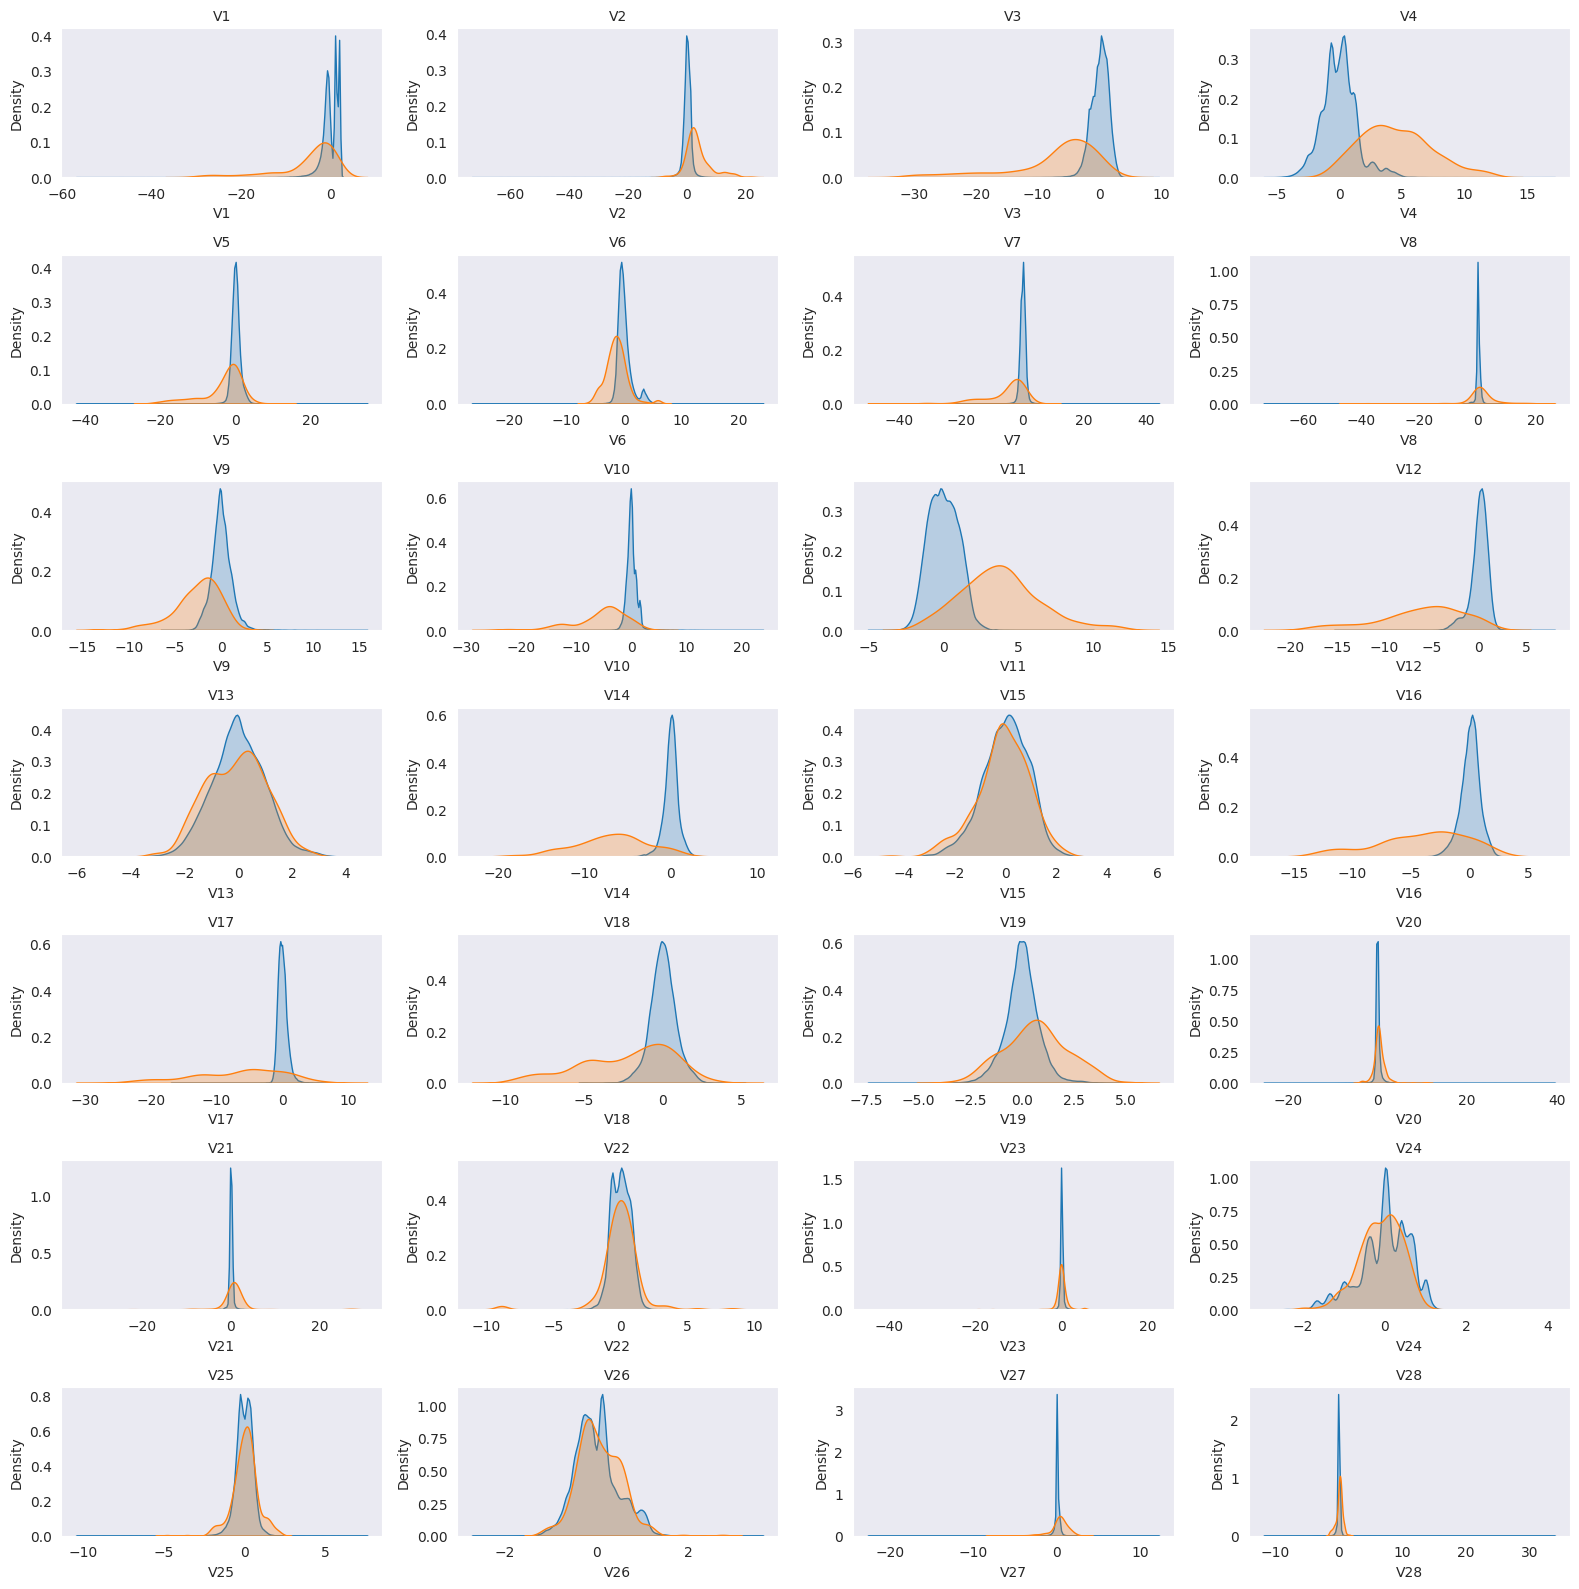

In [12]:
#obter o nome de cada coluna, exceto 'Class', 'Amount' e 'Time' e organizar os dados
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

#plotar o gráfico de todas as distribuições
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(16,16))
fig.subplots_adjust(hspace=1, wspace=1)

#loop for para plotar todos os 28 gráficos das variáveis
i = 0
for col in column_names:
  i += 1
  plt.subplot(7, 4, i)
  sns.kdeplot(df_class_0[col], label='Normal', shade=True)
  sns.kdeplot(df_class_1[col], label='Fradulenta', shade=True)
  plt.title(col, fontsize=10)

plt.tight_layout()



A partir do gráfico acima, observamos que as variáveis como `V13`, `V15`, `V22`, `V25` e `V26` possuem distribuição muito similar, já as variáveis `V3`, `V4`, `V10` e `V11` são bem diferentes, que serão muiot úteis para treinar o modelo.

Finalizando a Análise Exploratória dos dados, podemos concluir que:

* Como transações fraudulentas representam apenas 0,17% das transações totais, o *dataset* está bem desbalanceado.
* `Time` e `Amount` não estão normalizadas, assim como não há valores ausentes no *dataset*.
* Como PCA é sensível à escala das variáveis, podemos assumir que as variáveis originais foram padronizadas.

## Preparando os dados

Nesta etapa, iremos:

* Padronizar `Time` e `Amount`
* Dividir o *dataset* entre dados de treino e teste
* Balancear o *dataset*, para evitar *overfitting* e uma baixa performance do modelo

### Padronizar `Time` e `Amount`

In [13]:
#criar uma cópia
df_clean = df.copy()

#padronizar usando StandardScaler()
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

#remover do dataset as colunas não padronizadas
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### Dividir entre Treino e Validação

In [14]:
#separar variáveis entre X e y, onde y é o alvo
X = df_clean.drop('Class', axis=1)
y = df['Class']

#dividir o dataset entre treino e teste com stratify=True, que faz com que treino e validação tenham o mesmo número de classes proporcionalmente
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceamento de Dados

In [15]:
#usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

#ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

Class
0    313
1    313
Name: count, dtype: int64


Como vemos acima, agora `y_rus` está com o número de classes balanceado. A seguir, vamos ver a matriz de correlação e descobrir quais variáveis estão mais ou menos correlacionadas uma com as outras.

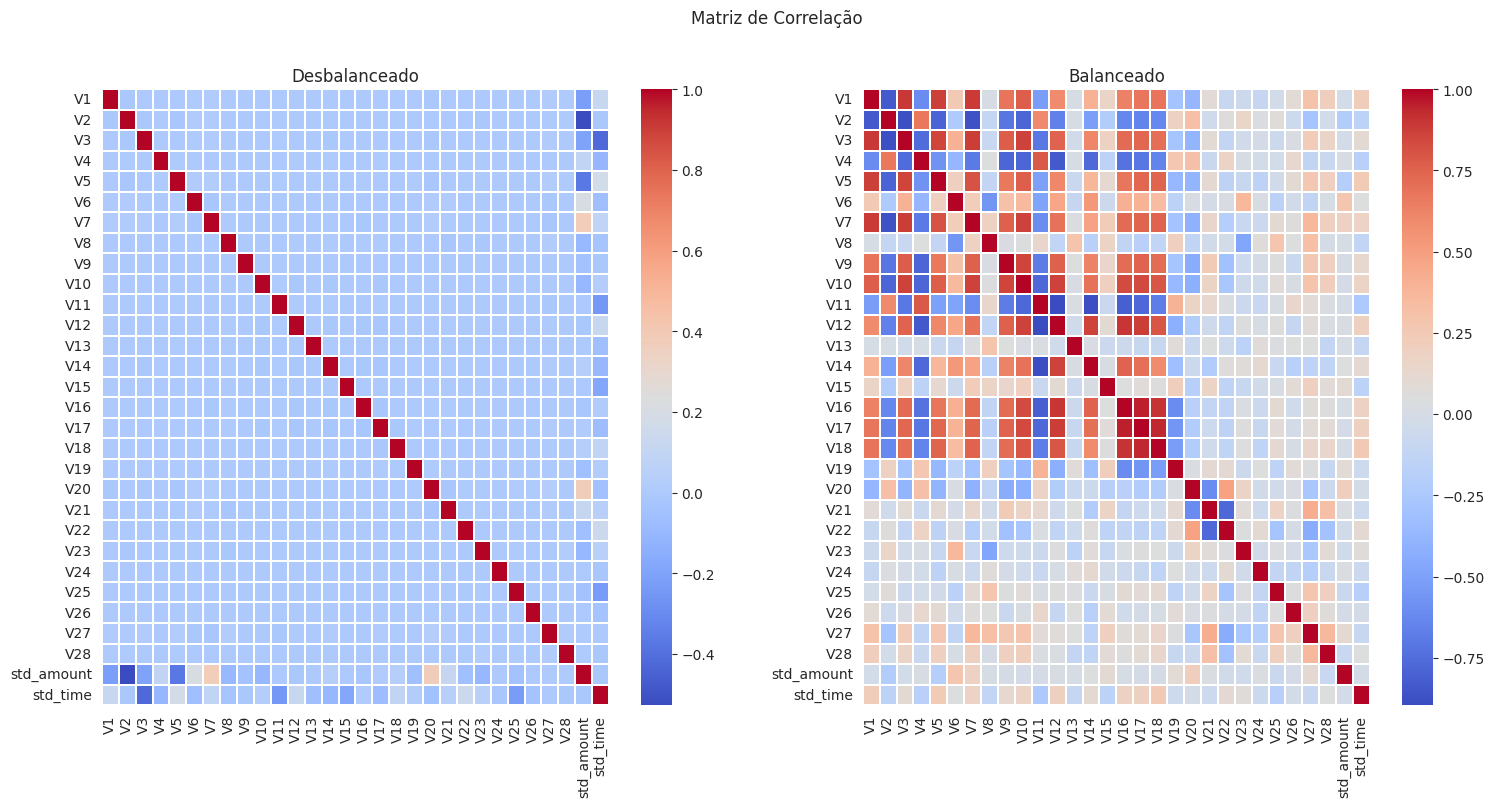

In [16]:
#plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

#personalizar os gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Podemos perceber que após o balanceamento dos dados, a matriz de correlação traz informações muito mais relevantes.

## Modelo de Machine Learning

Com a Análise Exploratória e a Preparação dos Dados concluída, agora iremos montar o nosso modelo de *Machine Learning* e em seguida, avaliá-lo. O classificador usará Regressão Logística, sendo treinado com os dados de `X_rus` e `y_rus`.

In [38]:
#instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

#fazer as previsões em cima dos dados de teste com os dados de validação
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

## Avaliar o desempenho do modelo

Neste tipo de problema, em que o *dataset* está originalmente desbalanceado, a acurácia não é a melhor forma de avaliar o modelo, como [neste artigo](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), que demonstra apesar de ter acurácia acima de 99%, detecta menos de 60% das fraudes. Portanto, o método principal utilizado nesses casos, é [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772). Abaixo, observaremos uma matriz de confusão e informações sobre a acurácia e sobre AUC ROC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9600    0.9795     60417
           1     0.0390    0.9333    0.0748       105

    accuracy                         0.9599     60522
   macro avg     0.5194    0.9467    0.5272     60522
weighted avg     0.9982    0.9599    0.9780     60522

Acurácia: 0.9599

AUC: 0.9467



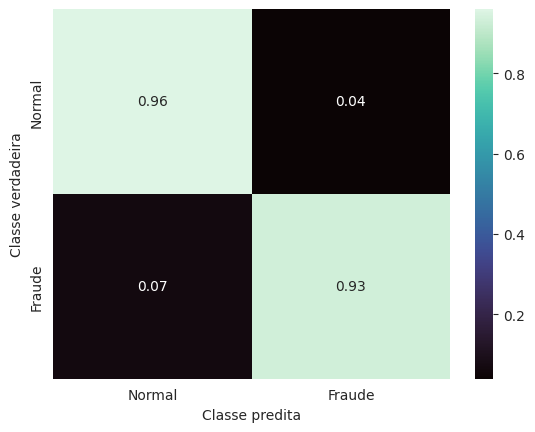

In [39]:
#criar a matriz de confusão, normalizá-la e plotá-la
cm = confusion_matrix(y_val, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
s = sns.heatmap(cmn, annot=True, fmt='.2f', cmap='mako', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
s.set_xlabel('Classe predita', fontsize=10)
s.set_ylabel('Classe verdadeira', fontsize=10)

#imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

#imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

#imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Previsões do Modelo com o conjunto de Teste

Nesta parte, iremos testar o modelo com o conjunto de testes que foi separado no começo do projeto. No entanto, ainda é necessário padronizar as colunas `Time` e `Amount`, pois os dados devem estar no mesmo formato que o modelo espera que esteja.

In [40]:
#criar uma cópia
test_clean = test.copy()

#padronizar usando StandardScaler()
std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

#remover do dataset as colunas não padronizadas
test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Em seguida, devemos separar em X e y (alvo) o conjunto de teste:

In [41]:
#separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [42]:
#fazer as previsões do modelo em cima dos dados de teste
y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)

Agora, iremos vizualizar o resultado, novamente com uma matrix de confusão:

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9613    0.9803     42647
           1     0.0413    0.9595    0.0792        74

    accuracy                         0.9613     42721
   macro avg     0.5206    0.9604    0.5297     42721
weighted avg     0.9983    0.9613    0.9787     42721

Acurácia: 0.9613

AUC: 0.9604



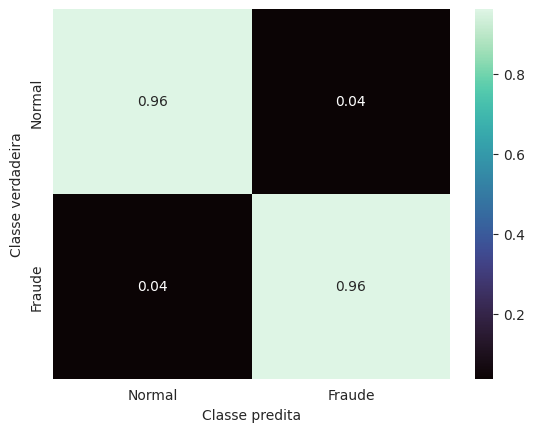

In [43]:
#criar a matriz de confusão, normalizá-la e plotá-la
cm = confusion_matrix(y_test, y_pred_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
h = sns.heatmap(cmn, annot=True, fmt='.2f', cmap='mako', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
h.set_xlabel('Classe predita', fontsize=10)
h.set_ylabel('Classe verdadeira', fontsize=10)

#imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_test, digits=4))

#imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_test)))

#imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_test)))

## Conclusão

Como vemos acima, o modelo teve um excelente resultado na classificação de fraudes em cartão de crédito, com acurácia e AUC ROC acima de 96%. Apesar da base de dados estar bem limpa, sem dados ausentes e variáveis que possam atrapalhar o treinamento do modelo, a transformação PCA e o desbalanceamento de dados demandaram um trabalho considerável para formatar corretamente os dados para a realização do modelo.